# Happiness Dataset

[Daily Happiness & Employee Turnover](https://www.kaggle.com/harriken/employeeturnover?select=churn.csv)
- churn.csv
- commentInteractions.csv
- comments_clean_anonimized.csv
- votes.csv

In [1]:
import numpy as np
import pandas as pd
# churn.csv
churn_df = pd.read_csv("./data/churn.csv")
churn_df.head()

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,Thu Feb 23 12:48:04 CET 2017,True
1,-2,56aec740f1ef260003e307d6,0,Wed Jan 18 14:00:55 CET 2017,False
2,2,56aec740f1ef260003e307d6,72,Fri Mar 17 01:00:00 CET 2017,True
3,487,56aec740f1ef260003e307d6,14,Sat Nov 19 15:02:14 CET 2016,False
4,3,56aec740f1ef260003e307d6,22,Thu Feb 16 01:00:00 CET 2017,True


In [2]:
# commentInteractions.csv
ci_df = pd.read_csv("./data/commentInteractions.csv", dtype={2: object, 3: object})
ci_df.head()

,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,true,false,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,true,false,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,true,false,58d018d7e010990004e38070
3,24,56aec740f1ef260003e307d6,true,false,58d018d7e010990004e38070
4,382,56aec740f1ef260003e307d6,true,false,58d0179ae010990004e3806d


In [3]:
# comments_clean_anonymized.csv
cca_df = pd.read_csv("./data/comments_clean_anonymized.csv")
cca_df.head()

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,Mon Mar 20 19:00:17 CET 2017
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,Mon Mar 20 18:55:16 CET 2017
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,Mon Mar 20 16:44:02 CET 2017
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,***************************,1.0,1.0,Mon Mar 20 16:06:08 CET 2017
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,Mon Mar 20 14:30:50 CET 2017


In [4]:
# votes
votes_df = pd.read_csv("./data/votes.csv")
votes_df.head()

,employee,companyAlias,voteDate,vote
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
3,94,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
4,16,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,2


### Data cleaning

In [5]:
# Check shape and type
print("====== churn_df ======")
print(churn_df.shape)
print(churn_df.dtypes)
churn_df.describe()

====== churn_df ======
(4847, 5)
employee                  int64
companyAlias             object
numVotes                  int64
lastParticipationDate    object
stillExists                bool
dtype: object


,employee,numVotes
count,4847.000000,4847.000000
mean,167.375490,45.896431
std,208.271041,71.302128
min,-218.000000,0.000000
25%,33.000000,3.000000
50%,113.000000,16.000000
75%,231.000000,59.000000
max,999.000000,740.000000


In [6]:
print("====== ci_df ======")
print(ci_df.shape)
print(ci_df.dtypes)
ci_df.describe()

====== ci_df ======
(336960, 5)
employee         int64
companyAlias    object
liked           object
disliked        object
commentId       object
dtype: object


,employee
count,336960.000000
mean,162.879475
std,182.069656
min,-218.000000
25%,38.000000
50%,122.000000
75%,212.000000
max,999.000000


In [7]:
# drop null values
ci_df = ci_df.dropna()
print(ci_df.shape)

# Convert "like", "dislike" columns to bool
ci_df["liked"] = (ci_df["liked"] == "true") * 1
ci_df["disliked"] = (ci_df["disliked"] == "true") * 1
print(ci_df.dtypes)
ci_df.head()

(336959, 5)
employee         int64
companyAlias    object
liked            int64
disliked         int64
commentId       object
dtype: object


,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070
3,24,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070
4,382,56aec740f1ef260003e307d6,1,0,58d0179ae010990004e3806d


In [8]:
print("====== cca_df ======")
print(cca_df.shape)
print(cca_df.dtypes)
cca_df.describe()

====== cca_df ======
(82756, 7)
employee          int64
companyAlias     object
commentId        object
txt              object
likes           float64
dislikes        float64
commentDate      object
dtype: object


,employee,likes,dislikes
count,82756.000000,82755.000000,82755.000000
mean,135.108427,6.873107,1.270534
std,161.530227,7.704659,2.715937
min,-217.000000,0.000000,0.000000
25%,29.000000,2.000000,0.000000
50%,102.000000,4.000000,0.000000
75%,197.000000,9.000000,1.000000
max,999.000000,86.000000,53.000000


In [9]:
print("====== votes_df ======")
print(votes_df.shape)
print(votes_df.dtypes)
votes_df.describe()

====== votes_df ======
(221232, 4)
employee         int64
companyAlias    object
voteDate        object
vote             int64
dtype: object


,employee,vote
count,221232.000000,221232.000000
mean,172.119562,2.861530
std,172.723491,0.986078
min,1.000000,1.000000
25%,50.000000,2.000000
50%,127.000000,3.000000
75%,222.000000,4.000000
max,999.000000,4.000000


## Descriptive Analysis

,employee,numVotes
count,4847.000000,4847.000000
mean,167.375490,45.896431
std,208.271041,71.302128
min,-218.000000,0.000000
25%,33.000000,3.000000
50%,113.000000,16.000000
75%,231.000000,59.000000
max,999.000000,740.000000


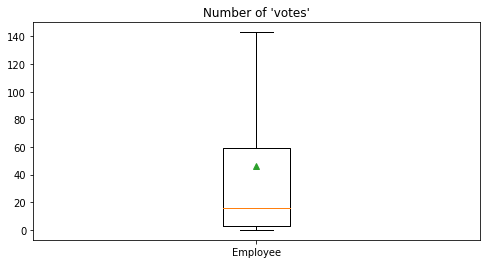

In [10]:
import matplotlib
from matplotlib import pyplot as plt
import math
# Number of votes distribution for all employees
existing_employees = churn_df[churn_df['employee'] >= 0]
churned_employees = churn_df[churn_df['employee'] < 0]

plt.figure(figsize=(8, 4))
plt.boxplot([churn_df["numVotes"]], 
            showfliers=False, showmeans=True)
plt.xticks([1], ["Employee"])
plt.title("Number of 'votes'")

churn_df.describe()

(array([3.417e+03, 5.750e+02, 2.470e+02, 1.110e+02, 3.900e+01, 1.200e+01,
        1.200e+01, 2.000e+00, 0.000e+00, 3.000e+00]),
 array([  0.,  74., 148., 222., 296., 370., 444., 518., 592., 666., 740.]),
 <BarContainer object of 10 artists>)

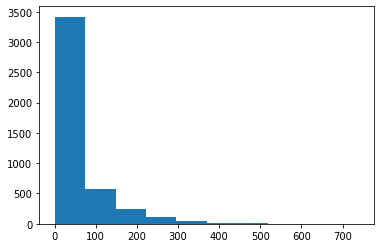

In [11]:
existing_employees = churn_df[churn_df['employee'] >= 0]
# Number of votes distribution for existing employees
plt.hist(existing_employees['numVotes'])


In [12]:
churned_employees = churn_df[churn_df['employee'] < 0]
# Number of votes distribution for churned employees
churned_employees.describe()

,employee,numVotes
count,429.000000,429.0
mean,-73.370629,0.0
std,62.181677,0.0
min,-218.000000,0.0
25%,-112.000000,0.0
50%,-56.000000,0.0
75%,-18.000000,0.0
max,-2.000000,0.0


^# NumVotes for churned_employees are all 0s...

In [13]:
cca_df['commentDate'] = pd.to_datetime(cca_df['commentDate']).dt.normalize()
cca_df['commentLength'] = cca_df['txt'].str.len()

churn_df["lastParticipationDate"] = pd.to_datetime(churn_df["lastParticipationDate"]).dt.normalize()
churn_cleaned = churn_df[~churn_df.duplicated(["employee", 
                                               "companyAlias"], keep=False)]
votes_df["voteDate"] = pd.to_datetime(votes_df["voteDate"]).dt.normalize()

firstVoteDate = votes_df.groupby(["employee", "companyAlias"]).agg({"voteDate": "min"}).reset_index()
firstVoteDate.rename(columns={"voteDate": "firstVoteDate"}, inplace=True)

firstCommentDate = cca_df.groupby(["employee", 
                                   "companyAlias"]).agg({"commentDate": "min"}).reset_index()
firstCommentDate.rename(columns={"commentDate": "firstCommentDate"}, inplace=True)
firstDates = pd.merge(firstVoteDate, firstCommentDate, on=["employee", "companyAlias"], how="outer")
firstDates["firstActiveDate"] = firstDates[['firstVoteDate','firstCommentDate']].min(axis=1)
firstDates

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/python_dateutil-2.8.1-py3.8.egg/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/python_dateutil-2.8.1-py3.8.egg/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25
1,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06
2,1,54e52607e4b01191dc064966,2015-03-25,NaT,2015-03-25
3,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28
4,1,56558cfd07a5de00030908fb,2015-11-25,2015-11-25,2015-11-25
...,...,...,...,...,...
4710,-2,57c4aa7dbb8b5c000396fd3b,NaT,2016-09-21,2016-09-21
4711,-2,57d1eb86a22c9d0003dd1f05,NaT,2016-09-12,2016-09-12
4712,-2,57dd2d6a4018d9000339ca43,NaT,2016-09-22,2016-09-22
4713,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01


In [39]:
# Calculate the number of comments each employee left
merged = pd.merge(churn_cleaned, cca_df, on=["employee", "companyAlias"], how="inner")

# Calculate the range of the date. 
count = merged.groupby(["employee", "companyAlias", 
                        "lastParticipationDate"]).agg({"commentId": "count", 
                                          "likes": "sum", 
                                          "dislikes": "sum", 
                                          "commentLength": "mean",
                                          "commentDate": "min", 
                                          "numVotes": "max", 
                                          "stillExists": "max"}).reset_index()
count = pd.merge(count, firstDates, on=["employee", "companyAlias"], how="inner")
count["dateRange"] = (count["lastParticipationDate"] - count["firstActiveDate"]).dt.days + 1
count["commentPerDay"] = count["commentId"]/ count["dateRange"]
count["likesPerComment"] = count["likes"] / count["commentId"]
count["dislikesPerComment"] = count["dislikes"] / count["commentId"]
count["votesPerDay"] = count["numVotes"] / count["dateRange"]
count = count.reset_index()
# churn_count = count[count["employee"] < 0]
# nonchurn_count = count[count["employee"] >= 0]
churn_count = count[count["stillExists"] == False]
nonchurn_count = count[count["stillExists"] == True]
count

,index,employee,companyAlias,lastParticipationDate,commentId,likes,dislikes,commentLength,commentDate,numVotes,stillExists,firstVoteDate,firstCommentDate,firstActiveDate,dateRange,commentPerDay,likesPerComment,dislikesPerComment,votesPerDay
0,0,-217,54e52607e4b01191dc064966,2015-02-26,2,16.0,0.0,258.000000,2015-02-26,0,False,NaT,2015-02-26,2015-02-26,1,2.000000,8.000000,0.000000,0.000000
1,1,-216,54e52607e4b01191dc064966,2015-03-03,6,24.0,0.0,25.000000,2015-02-25,0,False,NaT,2015-02-25,2015-02-25,7,0.857143,4.000000,0.000000,0.000000
2,2,-214,54e52607e4b01191dc064966,2015-03-06,2,0.0,0.0,4.000000,2015-03-06,0,False,NaT,2015-03-06,2015-03-06,1,2.000000,0.000000,0.000000,0.000000
3,3,-213,54e52607e4b01191dc064966,2015-03-09,2,2.0,0.0,51.000000,2015-03-09,0,False,NaT,2015-03-09,2015-03-09,1,2.000000,1.000000,0.000000,0.000000
4,4,-212,54e52607e4b01191dc064966,2015-03-10,2,0.0,0.0,6.000000,2015-03-10,0,False,NaT,2015-03-10,2015-03-10,1,2.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,3136,968,54e52607e4b01191dc064966,2016-12-02,16,94.0,28.0,24.375000,2016-09-13,27,True,2016-09-12,2016-09-13,2016-09-12,82,0.195122,5.875000,1.750000,0.329268
3137,3137,969,54e52607e4b01191dc064966,2016-11-30,4,22.0,6.0,33.500000,2016-10-10,18,True,2016-10-10,2016-10-10,2016-10-10,52,0.076923,5.500000,1.500000,0.346154
3138,3138,970,54e52607e4b01191dc064966,2017-02-06,30,538.0,50.0,211.733333,2016-09-13,36,True,2016-09-05,2016-09-13,2016-09-05,155,0.193548,17.933333,1.666667,0.232258
3139,3139,996,54e52607e4b01191dc064966,2017-03-15,12,84.0,12.0,83.666667,2016-09-05,20,True,2016-09-05,2016-09-05,2016-09-05,192,0.062500,7.000000,1.000000,0.104167


In [27]:
churn_count.describe()

,index,employee,commentId,likes,dislikes,commentLength,numVotes,dateRange,commentPerDay,likesPerDay,dislikesPerDay,votesPerDay
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,2075.986577,242.778523,43.503356,321.959732,77.382550,88.910617,104.369128,277.241611,0.226783,1.420234,0.307519,0.415384
std,796.635501,205.982446,80.624557,781.793485,220.870624,71.054400,116.563771,208.200289,0.350642,3.119533,0.786178,0.282303
min,333.000000,3.000000,2.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.002653,0.000000,0.000000,0.013393
25%,1389.000000,78.000000,8.000000,28.000000,4.000000,41.250000,22.000000,130.000000,0.048880,0.190476,0.019048,0.183007
50%,2242.000000,189.000000,20.000000,112.000000,18.000000,68.021978,67.000000,217.000000,0.106796,0.569492,0.089888,0.384181
75%,2801.000000,347.000000,36.000000,296.000000,46.000000,118.842105,144.000000,413.000000,0.256410,1.536723,0.266667,0.595318
max,3128.000000,887.000000,668.000000,6558.000000,1940.000000,364.500000,687.000000,756.000000,2.000000,30.235294,6.488294,1.000000


Average posts for churned and non-churned users are around the same.

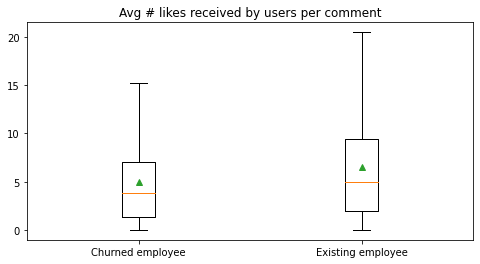

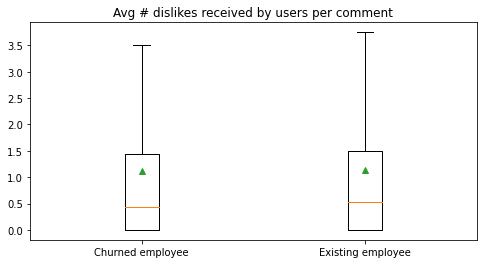

,index,employee,commentId,likes,dislikes,commentLength,numVotes,dateRange,commentPerDay,likesPerComment,dislikesPerComment,votesPerDay
count,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000
mean,1698.735436,165.878664,26.058627,181.066419,32.158442,88.400422,61.653432,165.406679,0.347156,6.510105,1.131668,0.438942
std,818.067136,178.872912,41.559667,371.524080,79.074625,79.315252,77.825196,148.622707,0.592478,5.782679,1.898243,0.297803
min,297.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.002653,0.000000,0.000000,0.008889
25%,990.500000,41.000000,4.000000,14.000000,0.000000,38.155556,10.000000,38.000000,0.051996,2.000000,0.000000,0.173913
50%,1691.000000,114.000000,10.000000,54.000000,6.000000,66.740741,30.000000,149.000000,0.142857,5.000000,0.526316,0.391304
75%,2399.500000,218.000000,30.000000,186.000000,28.000000,110.460526,84.000000,250.000000,0.369968,9.403390,1.500000,0.666667
max,3140.000000,999.000000,466.000000,4064.000000,1404.000000,880.500000,740.000000,771.000000,6.000000,46.000000,33.000000,1.000000


In [36]:
# boxplot
plt.figure(figsize=(8, 4))

plt.boxplot([churn_count["likesPerComment"], 
             nonchurn_count["likesPerComment"]], showfliers=False, showmeans=True)
plt.xticks([1, 2], ["Churned employee", "Existing employee"])
plt.title("Avg # likes received by users per comment")
plt.show()

plt.figure(figsize=(8, 4))
plt.boxplot([churn_count["dislikesPerComment"], 
             nonchurn_count["dislikesPerComment"]], showfliers=False, showmeans=True)
plt.xticks([1, 2], ["Churned employee", "Existing employee"])
plt.title("Avg # dislikes received by users per comment")
plt.show()

nonchurn_count.describe()

In [40]:
churn_count.describe()


,index,employee,commentId,likes,dislikes,commentLength,numVotes,dateRange,commentPerDay,likesPerComment,dislikesPerComment,votesPerDay
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,792.103139,33.282511,25.313901,159.246637,34.762332,73.203600,34.867713,137.506726,0.605719,4.944436,1.116867,0.138772
std,1022.147228,197.226889,51.635413,485.622225,132.974635,64.329763,83.352631,170.762253,0.763747,4.604004,2.102404,0.254907
min,0.000000,-217.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.002653,0.000000,0.000000,0.000000
25%,111.250000,-83.000000,4.000000,8.000000,0.000000,29.000000,0.000000,9.000000,0.088594,1.333333,0.000000,0.000000
50%,222.500000,-15.000000,10.000000,32.000000,4.000000,52.085366,0.000000,84.000000,0.262080,3.849906,0.433036,0.000000
75%,1378.750000,76.500000,26.000000,119.000000,22.000000,96.450321,22.000000,175.250000,0.904040,7.000000,1.435268,0.181861
max,3128.000000,887.000000,668.000000,6558.000000,1940.000000,364.500000,687.000000,756.000000,6.000000,25.700000,21.000000,1.000000


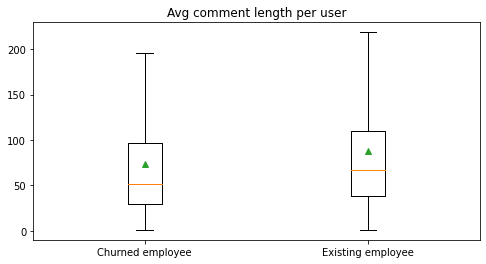

Avg comment length nonchurned users received:  88.40042207786095
Avg comment length churned users received:  73.20360030908373


In [34]:
# Avg post lengths
plt.figure(figsize=(8, 4))
plt.boxplot([churn_count["commentLength"], 
             nonchurn_count["commentLength"]], showfliers=False, showmeans=True)
plt.xticks([1, 2], ["Churned employee", "Existing employee"])
plt.title("Avg comment length per user")
plt.show()

print("Avg comment length nonchurned users received: ", nonchurn_count['commentLength'].mean())
print("Avg comment length churned users received: ", churn_count['commentLength'].mean())

Avg comment length for existing employees is longer. 

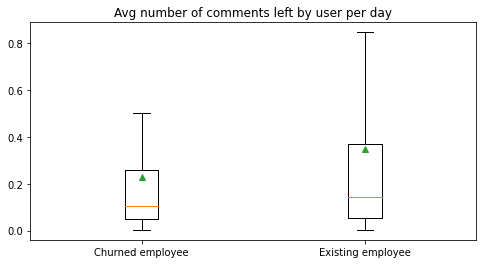

Avg number of comments for nonchurned users:  0.3471556502375084
Avg number of comments for churned users:  0.22678285482793548


In [37]:
# avg comment per day
churn_count = churn_count[churn_count["employee"] > 0]
plt.figure(figsize=(8, 4))
plt.boxplot([churn_count["commentPerDay"], 
             nonchurn_count["commentPerDay"]], showfliers=False, showmeans=True)
plt.xticks([1, 2], ["Churned employee", "Existing employee"])
plt.title("Avg number of comments left by user per day")
plt.show()

print("Avg number of comments for nonchurned users: ", nonchurn_count['commentPerDay'].mean())
print("Avg number of comments for churned users: ", churn_count['commentPerDay'].mean())

In [20]:
# Join the tables
votes_groupby = votes_df.groupby(["employee", "companyAlias"]).agg({"vote": "mean"}).reset_index()
votes_groupby

,employee,companyAlias,vote
0,1,5474b9cde4b0bf7614b2c66f,4.000000
1,1,54d43612e4b0f6a40755d93e,3.125000
2,1,54e52607e4b01191dc064966,2.985185
3,1,5641f96713664c000332c8cd,3.171206
4,1,56558cfd07a5de00030908fb,3.500000
...,...,...,...
4372,991,54e52607e4b01191dc064966,3.000000
4373,995,54e52607e4b01191dc064966,2.666667
4374,996,54e52607e4b01191dc064966,2.450000
4375,997,54e52607e4b01191dc064966,3.000000


In [21]:
votes_joined = pd.merge(churn_cleaned, votes_groupby, on=["employee", "companyAlias"], how="inner")
votes_joined

,employee,companyAlias,numVotes,lastParticipationDate,stillExists,vote
0,512,56aec740f1ef260003e307d6,4,2017-02-23,True,2.500000
1,2,56aec740f1ef260003e307d6,72,2017-03-17,True,2.250000
2,3,56aec740f1ef260003e307d6,22,2017-02-16,True,3.454545
3,4,56aec740f1ef260003e307d6,195,2017-03-20,True,3.856410
4,516,56aec740f1ef260003e307d6,29,2017-03-20,True,2.793103
...,...,...,...,...,...,...
4335,857,58a728a0e75bda00042a3468,1,2017-03-17,True,3.000000
4336,858,58a728a0e75bda00042a3468,1,2017-03-17,True,3.000000
4337,859,58a728a0e75bda00042a3468,1,2017-03-17,True,4.000000
4338,17,573a0671b5ec330003add34a,7,2016-06-28,True,3.571429


In [22]:
votes_joined.describe()

,employee,numVotes,vote
count,4340.000000,4340.000000,4340.000000
mean,190.182258,50.577419,2.946326
std,201.845949,73.321298,0.649931
min,1.000000,1.000000,1.000000
25%,50.000000,5.000000,2.641132
50%,130.000000,19.000000,3.000000
75%,246.000000,66.000000,3.333333
max,999.000000,740.000000,4.000000


Text(0, 0.5, '# users')

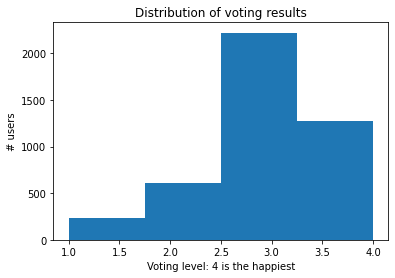

In [23]:
plt.hist(votes_joined['vote'], bins=4)
plt.title("Distribution of voting results")
plt.xlabel("Voting level: 4 is the happiest")
plt.ylabel("# users")

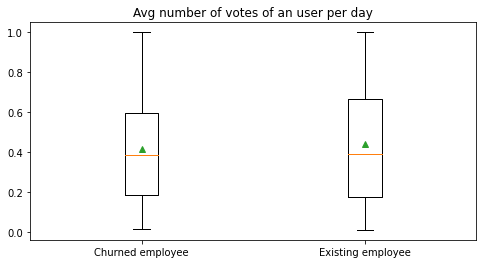

Avg number of votes for nonchurned users:  0.4389418478791552
Avg number of votes for churned users:  0.41538389942662424


In [24]:
# Avg number of votes lengths
plt.figure(figsize=(8, 4))
# churn = votes_joined[(votes_joined["stillExists"] == False) & votes_joined["employee"] > 0]
# nonchurn = votes_joined[votes_joined["stillExists"] == True]
plt.boxplot([churn_count[churn_count["employee"] > 0]["votesPerDay"], 
             nonchurn_count["votesPerDay"]], showfliers=False, showmeans=True)
plt.xticks([1, 2], ["Churned employee", "Existing employee"])
plt.title("Avg number of votes of an user per day")
plt.show()

print("Avg number of votes for nonchurned users: ", nonchurn_count['votesPerDay'].mean())
print("Avg number of votes for churned users: ", churn_count[churn_count["employee"] > 0]['votesPerDay'].mean())
# churn_count[churn_count["employee"] > 0].describe()

Challenge: No vote data for churned employees...